**Student ID**: 208040148

# STATISTICAL METHODS IN EXPERIMENTAL PHYSICS 
Practice paper questions #2


## Problem 1
### 1.0 Data Import

In [2]:
# Library imports for plotting figures and numerical processing
import matplotlib.pyplot as plt 
import numpy as np

# Import file as array
data1 = np.loadtxt("data1.dat")

### 1.1 Histogram

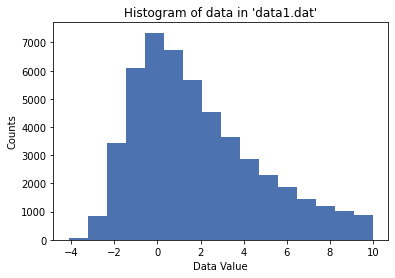

In [25]:
data1Min = np.min(data1)
data1Max = np.max(data1)
#nBins=int(np.sqrt(len(data1))) # discarded square root
nBins = int(1+np.log2(len(data1))) # Sturge's formula
#nBins = int(2*np.cbrt(len(data1))) # Rice rule
plt.xlabel("Data Value")
plt.ylabel("Counts")
plt.title("Histogram of data in 'data1.dat'")
#plt.style.use('seaborn-deep')
#myRange=[-10,50]
#plt.hist(students, bins =number_of_bins, range=myRange)
plt.hist(data1, bins =nBins)
plt.show()

**Discussion**: The distribution does not appear to be normally distributed, but rather a skewed distribution (right skewed, or positively skewed).

**Range**: The default range in the histogram seems to utilise the range of the data, as checked by determining the minimum and maximum values in the set. Therefore, it was left to be default range.

**Binning**: The bin width was left uniform to avoid possible ambiguity. The number of bins was determined with a subjective evaluation using the following rationale: The default of 10 was determined to be too low to sufficiently visually represent the distribution and the square root value gave a comb pattern with many alternate tall/short bars. Sturge's formula and Rice formula were then attempted, and Sturge's formula was ultimately used as it captured the major characteristics of the distribution visually without having too many bins distract the user.

**Mode from visual inspection**: appears to be roughly 0.
